In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data=pd.read_csv("./train.csv")
labels=pd.read_csv("./labels_train.csv")

In [3]:
data.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [4]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [5]:
len(data),len(labels)

(3999, 3999)

In [6]:
unique, counts = np.unique(labels, return_counts=True)
print(list(zip(unique, counts)))


[(0, 3445), (1, 554)]


In [7]:
data.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [8]:
len(np.unique(data['Cholesterol'])),len(np.unique(data['TroponinI'])),len(np.unique(data['TroponinT']))

(145, 138, 416)

In [9]:
data.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

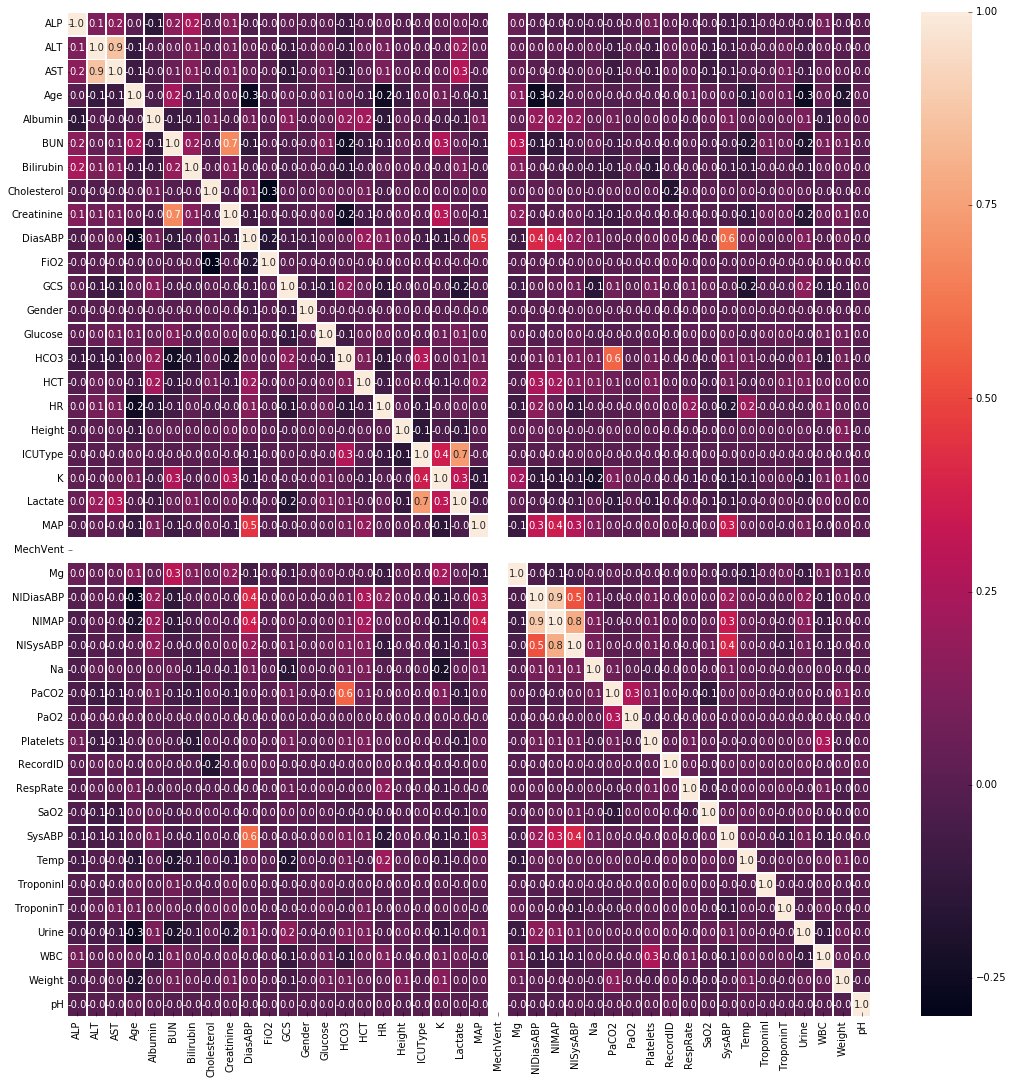

In [11]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='.1f')
plt.show()

In [12]:
data_corr=data.drop(['MechVent','RecordID','ICUType','NIMAP','Creatinine','Gender','AST','PaCO2','SysABP'],axis=1)

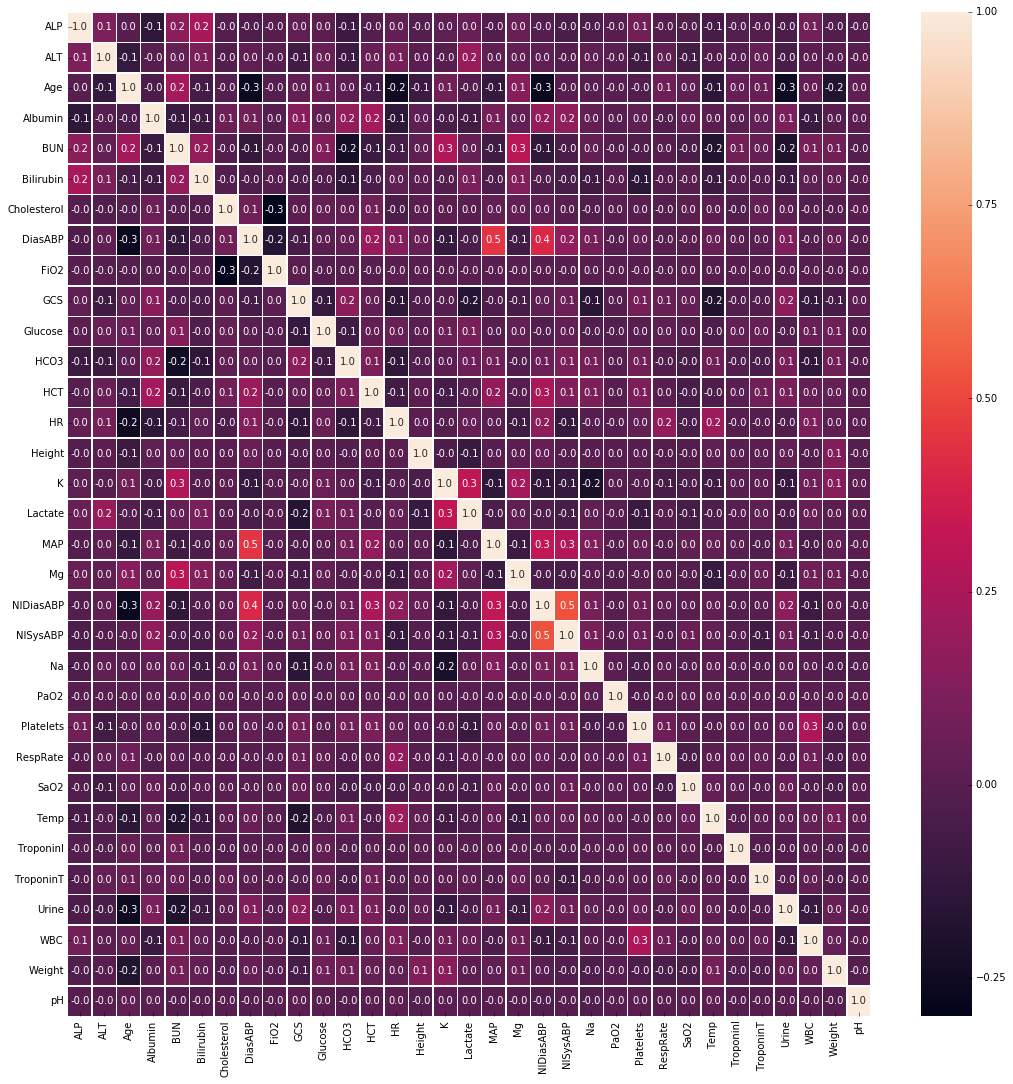

In [13]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data_corr.corr(),annot=True,linewidth=0.5,fmt='.1f')
plt.show()

In [14]:
len(data_corr.columns)

33

In [15]:
from sklearn.preprocessing import MinMaxScaler
#normalization
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(data_corr)

In [16]:
type(df)

numpy.ndarray

In [17]:
data_labels=[]
for i in labels["In-hospital_death"]:
    if i == 0:
        data_labels.append([1,0])
    else:
        data_labels.append([0,1])
data_labels = np.array(data_labels)

In [18]:
data_labels.shape

(3999, 2)

In [19]:
data_label_1=labels[labels["In-hospital_death"]==1].index
data_label_0=labels[labels["In-hospital_death"]==0].index


In [20]:
len(data_label_1)

554

In [21]:
data_1=df[data_label_1]
data_0=df[data_label_0]

In [22]:
label_1=data_labels[data_label_1]
label_0=data_labels[data_label_0]


In [23]:
label_1[0]

array([0, 1])

In [24]:
X=np.concatenate((data_1,data_0[:554]),axis=0)
y=np.concatenate((label_1,label_0[:554]),axis=0)

In [25]:
len(y)

1108

In [26]:
y[4]

array([0, 1])

In [27]:
perm=np.random.permutation(len(X))
X=X[perm]
y=y[perm]

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
X_train, X_test, y_train, y_test = tts( X, y, test_size=0.1, random_state=42)

In [30]:
unique, counts = np.unique(y_test, return_counts=True)
print(list(zip(unique, counts)))


[(0, 111), (1, 111)]


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy ",accuracy_score(y_pred,y_test))


accuracy  0.6846846846846847


In [ ]:
y_test.shape

In [34]:
print(confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
#[tp, fp, 
#fn, tn ]

[[40 15]
 [14 42]]


In [35]:
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

0.7368421052631579


In [36]:
from sklearn.metrics import recall_score,precision_score

In [37]:
print(recall_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

0.75


In [38]:
from keras.models import Model
from keras.layers import Input,Dense,Dropout,Conv1D,MaxPooling1D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam,RMSprop,SGD,Nadam,Adagrad
from keras.losses import mean_squared_error,binary_crossentropy
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers


Using TensorFlow backend.


In [39]:
from sklearn.utils.class_weight import compute_class_weight

In [103]:
def make_model():
    inputs=Input(shape=(33,))
    l=Dense(256)(inputs)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.5)(l)
    
    
    l=Dense(128)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.25)(l)
    
    l=Dense(128)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dense(64)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.4)(l)
    
    l=Dense(64)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dense(32)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.4)(l)
    
    l=Dense(32)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dense(16)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.4)(l)
    
    l=Dense(8)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.4)(l)
    
    l=Dense(4)(l)
    l=BatchNormalization()(l)
    l=Activation('relu')(l)
    
    l=Dropout(0.5)(l)
    
    
    l=Dense(2,activation='sigmoid')(l)
    outputs=l
    return inputs,outputs
    
    
    
    

In [104]:
inputs,outputs=make_model()
model=Model(inputs=inputs,outputs=outputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 33)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               8704      
_________________________________________________________________
batch_normalization_45 (Batc (None, 256)               1024      
_________________________________________________________________
activation_45 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_46 (Batc (None, 128)               512       
__________

In [105]:
model.compile(loss='binary_crossentropy',
            optimizer=Adam(lr=0.0005),
           metrics=['accuracy'])


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0,verbose=1)

In [ ]:
class_weights=compute_class_weight('balanced',np.array([0,1]),y_train.reshape(-1))

In [106]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 4s 4ms/step - loss: 0.8198 - acc: 0.5176 - val_loss: 0.7001 - val_acc: 0.5315
Epoch 2/100
997/997 [==============================] - 0s 122us/step - loss: 0.8304 - acc: 0.5095 - val_loss: 0.6937 - val_acc: 0.5045
Epoch 3/100
997/997 [==============================] - 0s 127us/step - loss: 0.8053 - acc: 0.5090 - val_loss: 0.6960 - val_acc: 0.5135
Epoch 4/100
997/997 [==============================] - 0s 126us/step - loss: 0.7747 - acc: 0.5336 - val_loss: 0.6968 - val_acc: 0.5090
Epoch 5/100
997/997 [==============================] - 0s 120us/step - loss: 0.8334 - acc: 0.4955 - val_loss: 0.6968 - val_acc: 0.5000
Epoch 6/100
997/997 [==============================] - 0s 122us/step - loss: 0.8146 - acc: 0.4835 - val_loss: 0.6941 - val_acc: 0.4910
Epoch 7/100
997/997 [==============================] - 0s 136us/step - loss: 0.8170 - acc: 0.4880 - val_loss: 0.6940 - val_acc: 0.5045
Epoch 8/100

Epoch 61/100
997/997 [==============================] - 0s 120us/step - loss: 0.6759 - acc: 0.5476 - val_loss: 0.6476 - val_acc: 0.6261
Epoch 62/100
997/997 [==============================] - 0s 111us/step - loss: 0.6774 - acc: 0.5396 - val_loss: 0.6478 - val_acc: 0.6306
Epoch 63/100
997/997 [==============================] - 0s 113us/step - loss: 0.6781 - acc: 0.5481 - val_loss: 0.6482 - val_acc: 0.6396
Epoch 64/100
997/997 [==============================] - 0s 113us/step - loss: 0.6758 - acc: 0.5582 - val_loss: 0.6490 - val_acc: 0.6306
Epoch 65/100
997/997 [==============================] - 0s 116us/step - loss: 0.6722 - acc: 0.5431 - val_loss: 0.6487 - val_acc: 0.6486
Epoch 66/100
997/997 [==============================] - 0s 115us/step - loss: 0.6869 - acc: 0.5251 - val_loss: 0.6488 - val_acc: 0.6441
Epoch 67/100
997/997 [==============================] - 0s 112us/step - loss: 0.6910 - acc: 0.5316 - val_loss: 0.6485 - val_acc: 0.6486
Epoch 68/100
997/997 [==========================

In [107]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 143us/step - loss: 0.6560 - acc: 0.5667 - val_loss: 0.6547 - val_acc: 0.6577
Epoch 2/100
997/997 [==============================] - 0s 134us/step - loss: 0.6656 - acc: 0.5567 - val_loss: 0.6552 - val_acc: 0.6577
Epoch 3/100
997/997 [==============================] - 0s 116us/step - loss: 0.6667 - acc: 0.5702 - val_loss: 0.6551 - val_acc: 0.6577
Epoch 4/100
997/997 [==============================] - 0s 119us/step - loss: 0.6727 - acc: 0.5672 - val_loss: 0.6551 - val_acc: 0.6486
Epoch 5/100
997/997 [==============================] - 0s 120us/step - loss: 0.6704 - acc: 0.5502 - val_loss: 0.6552 - val_acc: 0.6486
Epoch 6/100
997/997 [==============================] - 0s 120us/step - loss: 0.6600 - acc: 0.5797 - val_loss: 0.6544 - val_acc: 0.6622
Epoch 7/100
997/997 [==============================] - 0s 124us/step - loss: 0.6528 - acc: 0.5807 - val_loss: 0.6542 - val_acc: 0.6622
Epoch 8/1

Epoch 61/100
997/997 [==============================] - 0s 118us/step - loss: 0.6585 - acc: 0.5707 - val_loss: 0.6363 - val_acc: 0.6757
Epoch 62/100
997/997 [==============================] - 0s 111us/step - loss: 0.6468 - acc: 0.6128 - val_loss: 0.6360 - val_acc: 0.6757
Epoch 63/100
997/997 [==============================] - 0s 106us/step - loss: 0.6504 - acc: 0.5888 - val_loss: 0.6351 - val_acc: 0.6847
Epoch 64/100
997/997 [==============================] - 0s 111us/step - loss: 0.6328 - acc: 0.6043 - val_loss: 0.6345 - val_acc: 0.6847
Epoch 65/100
997/997 [==============================] - 0s 109us/step - loss: 0.6365 - acc: 0.5903 - val_loss: 0.6349 - val_acc: 0.6757
Epoch 66/100
997/997 [==============================] - 0s 110us/step - loss: 0.6293 - acc: 0.6179 - val_loss: 0.6341 - val_acc: 0.6802
Epoch 67/100
997/997 [==============================] - 0s 111us/step - loss: 0.6412 - acc: 0.5993 - val_loss: 0.6328 - val_acc: 0.6847
Epoch 68/100
997/997 [==========================

In [108]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 175us/step - loss: 0.6105 - acc: 0.6464 - val_loss: 0.6175 - val_acc: 0.7027
Epoch 2/50
997/997 [==============================] - 0s 152us/step - loss: 0.6285 - acc: 0.6269 - val_loss: 0.6166 - val_acc: 0.6937
Epoch 3/50
997/997 [==============================] - 0s 159us/step - loss: 0.6056 - acc: 0.6309 - val_loss: 0.6151 - val_acc: 0.6937
Epoch 4/50
997/997 [==============================] - 0s 142us/step - loss: 0.6204 - acc: 0.6434 - val_loss: 0.6137 - val_acc: 0.6892
Epoch 5/50
997/997 [==============================] - 0s 123us/step - loss: 0.6158 - acc: 0.6555 - val_loss: 0.6146 - val_acc: 0.6847
Epoch 6/50
997/997 [==============================] - 0s 123us/step - loss: 0.6080 - acc: 0.6520 - val_loss: 0.6157 - val_acc: 0.6847
Epoch 7/50
997/997 [==============================] - 0s 144us/step - loss: 0.6246 - acc: 0.6279 - val_loss: 0.6169 - val_acc: 0.6847
Epoch 8/50
997/9

In [111]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 135us/step - loss: 0.5839 - acc: 0.6871 - val_loss: 0.5856 - val_acc: 0.7027
Epoch 2/100
997/997 [==============================] - 0s 125us/step - loss: 0.5892 - acc: 0.6620 - val_loss: 0.5838 - val_acc: 0.7072
Epoch 3/100
997/997 [==============================] - 0s 123us/step - loss: 0.5799 - acc: 0.6775 - val_loss: 0.5847 - val_acc: 0.7117
Epoch 4/100
997/997 [==============================] - 0s 121us/step - loss: 0.5989 - acc: 0.6755 - val_loss: 0.5844 - val_acc: 0.7072
Epoch 5/100
997/997 [==============================] - 0s 124us/step - loss: 0.5888 - acc: 0.6645 - val_loss: 0.5859 - val_acc: 0.7072
Epoch 6/100
997/997 [==============================] - 0s 119us/step - loss: 0.5821 - acc: 0.6705 - val_loss: 0.5858 - val_acc: 0.7117
Epoch 7/100
997/997 [==============================] - 0s 126us/step - loss: 0.5933 - acc: 0.6645 - val_loss: 0.5869 - val_acc: 0.7162
Epoch 8/1

Epoch 61/100
997/997 [==============================] - 0s 123us/step - loss: 0.5565 - acc: 0.6901 - val_loss: 0.5852 - val_acc: 0.7252
Epoch 62/100
997/997 [==============================] - 0s 111us/step - loss: 0.5717 - acc: 0.6725 - val_loss: 0.5878 - val_acc: 0.7252
Epoch 63/100
997/997 [==============================] - 0s 111us/step - loss: 0.5811 - acc: 0.6570 - val_loss: 0.5923 - val_acc: 0.7297
Epoch 64/100
997/997 [==============================] - 0s 115us/step - loss: 0.5684 - acc: 0.6675 - val_loss: 0.5983 - val_acc: 0.6937
Epoch 65/100
997/997 [==============================] - 0s 111us/step - loss: 0.5564 - acc: 0.6775 - val_loss: 0.6065 - val_acc: 0.6757
Epoch 66/100
997/997 [==============================] - 0s 115us/step - loss: 0.5580 - acc: 0.6785 - val_loss: 0.6099 - val_acc: 0.6712
Epoch 67/100
997/997 [==============================] - 0s 111us/step - loss: 0.5380 - acc: 0.6931 - val_loss: 0.6153 - val_acc: 0.6667
Epoch 68/100
997/997 [==========================

In [114]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 136us/step - loss: 0.5297 - acc: 0.7031 - val_loss: 0.5778 - val_acc: 0.7117
Epoch 2/100
997/997 [==============================] - 0s 117us/step - loss: 0.5346 - acc: 0.7116 - val_loss: 0.5853 - val_acc: 0.7117
Epoch 3/100
997/997 [==============================] - 0s 115us/step - loss: 0.5425 - acc: 0.7041 - val_loss: 0.5909 - val_acc: 0.7162
Epoch 4/100
997/997 [==============================] - 0s 112us/step - loss: 0.5123 - acc: 0.7166 - val_loss: 0.5966 - val_acc: 0.7207
Epoch 5/100
997/997 [==============================] - 0s 114us/step - loss: 0.5292 - acc: 0.7021 - val_loss: 0.5962 - val_acc: 0.7207
Epoch 6/100
997/997 [==============================] - 0s 115us/step - loss: 0.5328 - acc: 0.6951 - val_loss: 0.5898 - val_acc: 0.7207
Epoch 7/100
997/997 [==============================] - 0s 126us/step - loss: 0.5323 - acc: 0.7086 - val_loss: 0.5850 - val_acc: 0.7207
Epoch 8/1

Epoch 61/100
997/997 [==============================] - 0s 123us/step - loss: 0.5058 - acc: 0.7317 - val_loss: 0.5828 - val_acc: 0.7297
Epoch 62/100
997/997 [==============================] - 0s 116us/step - loss: 0.4942 - acc: 0.7166 - val_loss: 0.5817 - val_acc: 0.7252
Epoch 63/100
997/997 [==============================] - 0s 112us/step - loss: 0.4881 - acc: 0.7197 - val_loss: 0.5876 - val_acc: 0.7252
Epoch 64/100
997/997 [==============================] - 0s 113us/step - loss: 0.4870 - acc: 0.7302 - val_loss: 0.5863 - val_acc: 0.7297
Epoch 65/100
997/997 [==============================] - 0s 115us/step - loss: 0.5101 - acc: 0.7302 - val_loss: 0.5850 - val_acc: 0.7252
Epoch 66/100
997/997 [==============================] - 0s 113us/step - loss: 0.4886 - acc: 0.7337 - val_loss: 0.5874 - val_acc: 0.7072
Epoch 67/100
997/997 [==============================] - 0s 111us/step - loss: 0.4662 - acc: 0.7437 - val_loss: 0.6082 - val_acc: 0.7297
Epoch 68/100
997/997 [==========================

In [115]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 118us/step - loss: 0.5067 - acc: 0.7262 - val_loss: 0.6097 - val_acc: 0.7207
Epoch 2/50
997/997 [==============================] - 0s 131us/step - loss: 0.4780 - acc: 0.7367 - val_loss: 0.6113 - val_acc: 0.7252
Epoch 3/50
997/997 [==============================] - 0s 121us/step - loss: 0.4674 - acc: 0.7402 - val_loss: 0.6143 - val_acc: 0.7162
Epoch 4/50
997/997 [==============================] - 0s 114us/step - loss: 0.4663 - acc: 0.7407 - val_loss: 0.6101 - val_acc: 0.7252
Epoch 5/50
997/997 [==============================] - 0s 117us/step - loss: 0.5144 - acc: 0.7262 - val_loss: 0.6106 - val_acc: 0.7297
Epoch 6/50
997/997 [==============================] - 0s 121us/step - loss: 0.4778 - acc: 0.7372 - val_loss: 0.6024 - val_acc: 0.7207
Epoch 7/50
997/997 [==============================] - 0s 116us/step - loss: 0.4863 - acc: 0.7492 - val_loss: 0.6063 - val_acc: 0.7072
Epoch 8/50
997/9

In [116]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=30,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/30
997/997 [==============================] - 0s 129us/step - loss: 0.4478 - acc: 0.7623 - val_loss: 0.7276 - val_acc: 0.6577
Epoch 2/30
997/997 [==============================] - 0s 117us/step - loss: 0.4581 - acc: 0.7342 - val_loss: 0.7231 - val_acc: 0.6577
Epoch 3/30
997/997 [==============================] - 0s 113us/step - loss: 0.4371 - acc: 0.7588 - val_loss: 0.6896 - val_acc: 0.6757
Epoch 4/30
997/997 [==============================] - 0s 108us/step - loss: 0.4299 - acc: 0.7633 - val_loss: 0.6583 - val_acc: 0.6982
Epoch 5/30
997/997 [==============================] - 0s 111us/step - loss: 0.4527 - acc: 0.7603 - val_loss: 0.6484 - val_acc: 0.7117
Epoch 6/30
997/997 [==============================] - 0s 119us/step - loss: 0.4271 - acc: 0.7623 - val_loss: 0.6541 - val_acc: 0.7027
Epoch 7/30
997/997 [==============================] - 0s 125us/step - loss: 0.4468 - acc: 0.7487 - val_loss: 0.6566 - val_acc: 0.6937
Epoch 8/30
997/9

In [118]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/50
997/997 [==============================] - 0s 140us/step - loss: 0.4376 - acc: 0.7573 - val_loss: 0.7293 - val_acc: 0.6847
Epoch 2/50
997/997 [==============================] - 0s 121us/step - loss: 0.4183 - acc: 0.7603 - val_loss: 0.7231 - val_acc: 0.6757
Epoch 3/50
997/997 [==============================] - 0s 117us/step - loss: 0.4491 - acc: 0.7543 - val_loss: 0.7071 - val_acc: 0.6757
Epoch 4/50
997/997 [==============================] - 0s 116us/step - loss: 0.4286 - acc: 0.7618 - val_loss: 0.6868 - val_acc: 0.6937
Epoch 5/50
997/997 [==============================] - 0s 115us/step - loss: 0.4396 - acc: 0.7558 - val_loss: 0.6847 - val_acc: 0.6937
Epoch 6/50
997/997 [==============================] - 0s 118us/step - loss: 0.4299 - acc: 0.7497 - val_loss: 0.6825 - val_acc: 0.7027
Epoch 7/50
997/997 [==============================] - 0s 114us/step - loss: 0.4364 - acc: 0.7573 - val_loss: 0.6968 - val_acc: 0.6937
Epoch 8/50
997/9

In [126]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=115,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/115
997/997 [==============================] - 0s 136us/step - loss: 0.3701 - acc: 0.7969 - val_loss: 0.7134 - val_acc: 0.7117
Epoch 2/115
997/997 [==============================] - 0s 125us/step - loss: 0.3901 - acc: 0.7944 - val_loss: 0.7210 - val_acc: 0.7027
Epoch 3/115
997/997 [==============================] - 0s 126us/step - loss: 0.3995 - acc: 0.7768 - val_loss: 0.7466 - val_acc: 0.6937
Epoch 4/115
997/997 [==============================] - 0s 119us/step - loss: 0.4079 - acc: 0.7778 - val_loss: 0.7682 - val_acc: 0.6847
Epoch 5/115
997/997 [==============================] - 0s 125us/step - loss: 0.3958 - acc: 0.7914 - val_loss: 0.7308 - val_acc: 0.7207
Epoch 6/115
997/997 [==============================] - 0s 124us/step - loss: 0.3742 - acc: 0.7869 - val_loss: 0.7066 - val_acc: 0.7297
Epoch 7/115
997/997 [==============================] - 0s 128us/step - loss: 0.4214 - acc: 0.7758 - val_loss: 0.6819 - val_acc: 0.7477
Epoch 8/1

Epoch 61/115
997/997 [==============================] - 0s 125us/step - loss: 0.3711 - acc: 0.7944 - val_loss: 0.7740 - val_acc: 0.7387
Epoch 62/115
997/997 [==============================] - 0s 112us/step - loss: 0.3628 - acc: 0.7979 - val_loss: 0.7902 - val_acc: 0.7207
Epoch 63/115
997/997 [==============================] - 0s 110us/step - loss: 0.3827 - acc: 0.8004 - val_loss: 0.7824 - val_acc: 0.7207
Epoch 64/115
997/997 [==============================] - 0s 115us/step - loss: 0.3674 - acc: 0.7798 - val_loss: 0.7948 - val_acc: 0.7207
Epoch 65/115
997/997 [==============================] - 0s 114us/step - loss: 0.3988 - acc: 0.7803 - val_loss: 0.8283 - val_acc: 0.7027
Epoch 66/115
997/997 [==============================] - 0s 109us/step - loss: 0.3482 - acc: 0.8004 - val_loss: 0.8373 - val_acc: 0.7117
Epoch 67/115
997/997 [==============================] - 0s 110us/step - loss: 0.3733 - acc: 0.7949 - val_loss: 0.8317 - val_acc: 0.7117
Epoch 68/115
997/997 [==========================

In [129]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 135us/step - loss: 0.3474 - acc: 0.8039 - val_loss: 0.8026 - val_acc: 0.7027
Epoch 2/100
997/997 [==============================] - 0s 130us/step - loss: 0.3664 - acc: 0.8154 - val_loss: 0.8403 - val_acc: 0.7027
Epoch 3/100
997/997 [==============================] - 0s 124us/step - loss: 0.3809 - acc: 0.7818 - val_loss: 0.8568 - val_acc: 0.7117
Epoch 4/100
997/997 [==============================] - 0s 120us/step - loss: 0.3552 - acc: 0.8059 - val_loss: 0.8395 - val_acc: 0.7207
Epoch 5/100
997/997 [==============================] - 0s 117us/step - loss: 0.3704 - acc: 0.7854 - val_loss: 0.8379 - val_acc: 0.7207
Epoch 6/100
997/997 [==============================] - 0s 119us/step - loss: 0.3396 - acc: 0.8159 - val_loss: 0.8220 - val_acc: 0.7207
Epoch 7/100
997/997 [==============================] - 0s 123us/step - loss: 0.3417 - acc: 0.8114 - val_loss: 0.8350 - val_acc: 0.7207
Epoch 8/1

Epoch 61/100
997/997 [==============================] - 0s 117us/step - loss: 0.3607 - acc: 0.7994 - val_loss: 0.9301 - val_acc: 0.7027
Epoch 62/100
997/997 [==============================] - 0s 106us/step - loss: 0.3601 - acc: 0.7899 - val_loss: 0.9457 - val_acc: 0.7027
Epoch 63/100
997/997 [==============================] - 0s 102us/step - loss: 0.3171 - acc: 0.8175 - val_loss: 0.9394 - val_acc: 0.7117
Epoch 64/100
997/997 [==============================] - 0s 111us/step - loss: 0.3081 - acc: 0.8245 - val_loss: 0.9163 - val_acc: 0.7117
Epoch 65/100
997/997 [==============================] - 0s 107us/step - loss: 0.3589 - acc: 0.7934 - val_loss: 0.9027 - val_acc: 0.7207
Epoch 66/100
997/997 [==============================] - 0s 110us/step - loss: 0.3483 - acc: 0.8215 - val_loss: 0.8815 - val_acc: 0.7297
Epoch 67/100
997/997 [==============================] - 0s 120us/step - loss: 0.3659 - acc: 0.8069 - val_loss: 0.8595 - val_acc: 0.7387
Epoch 68/100
997/997 [==========================

In [132]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=300,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/300
997/997 [==============================] - 0s 146us/step - loss: 0.3460 - acc: 0.8034 - val_loss: 0.8400 - val_acc: 0.7297
Epoch 2/300
997/997 [==============================] - 0s 121us/step - loss: 0.3342 - acc: 0.8114 - val_loss: 0.8354 - val_acc: 0.7207
Epoch 3/300
997/997 [==============================] - 0s 123us/step - loss: 0.3066 - acc: 0.8164 - val_loss: 0.8309 - val_acc: 0.7297
Epoch 4/300
997/997 [==============================] - 0s 121us/step - loss: 0.3231 - acc: 0.8170 - val_loss: 0.8241 - val_acc: 0.7207
Epoch 5/300
997/997 [==============================] - 0s 126us/step - loss: 0.3218 - acc: 0.8330 - val_loss: 0.8167 - val_acc: 0.7117
Epoch 6/300
997/997 [==============================] - 0s 125us/step - loss: 0.3321 - acc: 0.8049 - val_loss: 0.8086 - val_acc: 0.7387
Epoch 7/300
997/997 [==============================] - 0s 119us/step - loss: 0.3307 - acc: 0.8220 - val_loss: 0.7925 - val_acc: 0.7477
Epoch 8/3

Epoch 61/300
997/997 [==============================] - 0s 116us/step - loss: 0.3598 - acc: 0.7969 - val_loss: 0.8202 - val_acc: 0.7387
Epoch 62/300
997/997 [==============================] - 0s 111us/step - loss: 0.3311 - acc: 0.8064 - val_loss: 0.8301 - val_acc: 0.7297
Epoch 63/300
997/997 [==============================] - 0s 111us/step - loss: 0.2989 - acc: 0.8405 - val_loss: 0.8383 - val_acc: 0.7117
Epoch 64/300
997/997 [==============================] - 0s 109us/step - loss: 0.3134 - acc: 0.8195 - val_loss: 0.8205 - val_acc: 0.7297
Epoch 65/300
997/997 [==============================] - 0s 115us/step - loss: 0.3394 - acc: 0.8024 - val_loss: 0.8053 - val_acc: 0.7207
Epoch 66/300
997/997 [==============================] - 0s 113us/step - loss: 0.2928 - acc: 0.8375 - val_loss: 0.8061 - val_acc: 0.6847
Epoch 67/300
997/997 [==============================] - 0s 111us/step - loss: 0.3156 - acc: 0.8149 - val_loss: 0.8171 - val_acc: 0.6847
Epoch 68/300
997/997 [==========================

997/997 [==============================] - 0s 120us/step - loss: 0.3201 - acc: 0.8305 - val_loss: 1.0903 - val_acc: 0.7027
Epoch 122/300
997/997 [==============================] - 0s 110us/step - loss: 0.2902 - acc: 0.8455 - val_loss: 1.1130 - val_acc: 0.6847
Epoch 123/300
997/997 [==============================] - 0s 110us/step - loss: 0.3306 - acc: 0.8175 - val_loss: 1.1113 - val_acc: 0.6847
Epoch 124/300
997/997 [==============================] - 0s 109us/step - loss: 0.2953 - acc: 0.8225 - val_loss: 1.0969 - val_acc: 0.6757
Epoch 125/300
997/997 [==============================] - 0s 113us/step - loss: 0.3175 - acc: 0.8129 - val_loss: 1.0821 - val_acc: 0.6847
Epoch 126/300
997/997 [==============================] - 0s 109us/step - loss: 0.3155 - acc: 0.8190 - val_loss: 1.0741 - val_acc: 0.7027
Epoch 127/300
997/997 [==============================] - 0s 114us/step - loss: 0.3211 - acc: 0.8230 - val_loss: 1.0550 - val_acc: 0.7027
Epoch 128/300
997/997 [==============================] 

Epoch 181/300
997/997 [==============================] - 0s 114us/step - loss: 0.2924 - acc: 0.8475 - val_loss: 0.8877 - val_acc: 0.7387
Epoch 182/300
997/997 [==============================] - 0s 108us/step - loss: 0.2980 - acc: 0.8305 - val_loss: 0.9061 - val_acc: 0.7387
Epoch 183/300
997/997 [==============================] - 0s 113us/step - loss: 0.2939 - acc: 0.8405 - val_loss: 0.9152 - val_acc: 0.7568
Epoch 184/300
997/997 [==============================] - 0s 111us/step - loss: 0.3096 - acc: 0.8295 - val_loss: 0.9253 - val_acc: 0.7387
Epoch 185/300
997/997 [==============================] - 0s 105us/step - loss: 0.3065 - acc: 0.8345 - val_loss: 0.9033 - val_acc: 0.7387
Epoch 186/300
997/997 [==============================] - 0s 113us/step - loss: 0.2762 - acc: 0.8475 - val_loss: 0.8719 - val_acc: 0.7477
Epoch 187/300
997/997 [==============================] - 0s 111us/step - loss: 0.3118 - acc: 0.8235 - val_loss: 0.8493 - val_acc: 0.7477
Epoch 188/300
997/997 [==================

Epoch 241/300
997/997 [==============================] - 0s 115us/step - loss: 0.2965 - acc: 0.8084 - val_loss: 1.0322 - val_acc: 0.6937
Epoch 242/300
997/997 [==============================] - 0s 113us/step - loss: 0.2813 - acc: 0.8265 - val_loss: 1.0400 - val_acc: 0.6937
Epoch 243/300
997/997 [==============================] - 0s 108us/step - loss: 0.3533 - acc: 0.7944 - val_loss: 1.0384 - val_acc: 0.7117
Epoch 244/300
997/997 [==============================] - 0s 145us/step - loss: 0.2782 - acc: 0.8325 - val_loss: 1.0569 - val_acc: 0.7117
Epoch 245/300
997/997 [==============================] - 0s 131us/step - loss: 0.2812 - acc: 0.8445 - val_loss: 1.0779 - val_acc: 0.6937
Epoch 246/300
997/997 [==============================] - 0s 136us/step - loss: 0.2781 - acc: 0.8305 - val_loss: 1.0976 - val_acc: 0.6937
Epoch 247/300
997/997 [==============================] - 0s 146us/step - loss: 0.2938 - acc: 0.8385 - val_loss: 1.1358 - val_acc: 0.6847
Epoch 248/300
997/997 [==================

In [133]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=200,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/200
997/997 [==============================] - 0s 148us/step - loss: 0.2762 - acc: 0.8325 - val_loss: 1.1017 - val_acc: 0.6667
Epoch 2/200
997/997 [==============================] - 0s 124us/step - loss: 0.2905 - acc: 0.8365 - val_loss: 1.0899 - val_acc: 0.6577
Epoch 3/200
997/997 [==============================] - 0s 119us/step - loss: 0.2711 - acc: 0.8365 - val_loss: 1.0743 - val_acc: 0.6847
Epoch 4/200
997/997 [==============================] - 0s 120us/step - loss: 0.2854 - acc: 0.8195 - val_loss: 1.0711 - val_acc: 0.6847
Epoch 5/200
997/997 [==============================] - 0s 124us/step - loss: 0.2913 - acc: 0.8215 - val_loss: 1.0498 - val_acc: 0.6847
Epoch 6/200
997/997 [==============================] - 0s 120us/step - loss: 0.2873 - acc: 0.8345 - val_loss: 1.0233 - val_acc: 0.6937
Epoch 7/200
997/997 [==============================] - 0s 126us/step - loss: 0.3099 - acc: 0.8195 - val_loss: 1.0402 - val_acc: 0.6937
Epoch 8/2

Epoch 61/200
997/997 [==============================] - 0s 128us/step - loss: 0.2580 - acc: 0.8465 - val_loss: 1.0577 - val_acc: 0.6847
Epoch 62/200
997/997 [==============================] - 0s 114us/step - loss: 0.2991 - acc: 0.8395 - val_loss: 1.0788 - val_acc: 0.6847
Epoch 63/200
997/997 [==============================] - 0s 117us/step - loss: 0.2688 - acc: 0.8285 - val_loss: 1.0791 - val_acc: 0.6937
Epoch 64/200
997/997 [==============================] - 0s 113us/step - loss: 0.2617 - acc: 0.8495 - val_loss: 1.0838 - val_acc: 0.6937
Epoch 65/200
997/997 [==============================] - 0s 138us/step - loss: 0.2667 - acc: 0.8606 - val_loss: 1.0825 - val_acc: 0.6937
Epoch 66/200
997/997 [==============================] - 0s 117us/step - loss: 0.2714 - acc: 0.8415 - val_loss: 1.0385 - val_acc: 0.7027
Epoch 67/200
997/997 [==============================] - 0s 112us/step - loss: 0.2666 - acc: 0.8465 - val_loss: 1.0198 - val_acc: 0.7117
Epoch 68/200
997/997 [==========================

997/997 [==============================] - 0s 147us/step - loss: 0.2709 - acc: 0.8265 - val_loss: 0.9520 - val_acc: 0.7477
Epoch 122/200
997/997 [==============================] - 0s 106us/step - loss: 0.2590 - acc: 0.8546 - val_loss: 0.9628 - val_acc: 0.7477
Epoch 123/200
997/997 [==============================] - 0s 114us/step - loss: 0.2514 - acc: 0.8616 - val_loss: 0.9775 - val_acc: 0.7297
Epoch 124/200
997/997 [==============================] - 0s 109us/step - loss: 0.2623 - acc: 0.8405 - val_loss: 1.0326 - val_acc: 0.7207
Epoch 125/200
997/997 [==============================] - 0s 110us/step - loss: 0.2508 - acc: 0.8445 - val_loss: 1.0871 - val_acc: 0.7387
Epoch 126/200
997/997 [==============================] - 0s 113us/step - loss: 0.2776 - acc: 0.8295 - val_loss: 1.1276 - val_acc: 0.7297
Epoch 127/200
997/997 [==============================] - 0s 158us/step - loss: 0.2525 - acc: 0.8475 - val_loss: 1.1481 - val_acc: 0.7027
Epoch 128/200
997/997 [==============================] 

Epoch 181/200
997/997 [==============================] - 0s 113us/step - loss: 0.2479 - acc: 0.8455 - val_loss: 1.1845 - val_acc: 0.6937
Epoch 182/200
997/997 [==============================] - 0s 109us/step - loss: 0.2949 - acc: 0.8225 - val_loss: 1.1803 - val_acc: 0.6937
Epoch 183/200
997/997 [==============================] - 0s 110us/step - loss: 0.2640 - acc: 0.8445 - val_loss: 1.1890 - val_acc: 0.7027
Epoch 184/200
997/997 [==============================] - 0s 110us/step - loss: 0.2433 - acc: 0.8445 - val_loss: 1.2025 - val_acc: 0.7117
Epoch 185/200
997/997 [==============================] - 0s 109us/step - loss: 0.2573 - acc: 0.8395 - val_loss: 1.2358 - val_acc: 0.7027
Epoch 186/200
997/997 [==============================] - 0s 113us/step - loss: 0.2353 - acc: 0.8435 - val_loss: 1.2386 - val_acc: 0.6937
Epoch 187/200
997/997 [==============================] - 0s 112us/step - loss: 0.2654 - acc: 0.8375 - val_loss: 1.2171 - val_acc: 0.7117
Epoch 188/200
997/997 [==================

In [135]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=500,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/500
997/997 [==============================] - 0s 137us/step - loss: 0.2594 - acc: 0.8465 - val_loss: 1.1304 - val_acc: 0.7387
Epoch 2/500
997/997 [==============================] - 0s 122us/step - loss: 0.3257 - acc: 0.8094 - val_loss: 1.0939 - val_acc: 0.7387
Epoch 3/500
997/997 [==============================] - 0s 115us/step - loss: 0.2750 - acc: 0.8225 - val_loss: 1.0579 - val_acc: 0.7387
Epoch 4/500
997/997 [==============================] - 0s 111us/step - loss: 0.2599 - acc: 0.8475 - val_loss: 1.0623 - val_acc: 0.7387
Epoch 5/500
997/997 [==============================] - 0s 114us/step - loss: 0.2648 - acc: 0.8365 - val_loss: 1.0863 - val_acc: 0.7387
Epoch 6/500
997/997 [==============================] - 0s 116us/step - loss: 0.2268 - acc: 0.8586 - val_loss: 1.0934 - val_acc: 0.7297
Epoch 7/500
997/997 [==============================] - 0s 118us/step - loss: 0.2970 - acc: 0.8265 - val_loss: 1.1094 - val_acc: 0.7207
Epoch 8/5

Epoch 61/500
997/997 [==============================] - 0s 118us/step - loss: 0.2670 - acc: 0.8345 - val_loss: 1.2540 - val_acc: 0.6937
Epoch 62/500
997/997 [==============================] - 0s 109us/step - loss: 0.2466 - acc: 0.8425 - val_loss: 1.2388 - val_acc: 0.7027
Epoch 63/500
997/997 [==============================] - 0s 114us/step - loss: 0.2766 - acc: 0.8345 - val_loss: 1.2338 - val_acc: 0.6937
Epoch 64/500
997/997 [==============================] - 0s 114us/step - loss: 0.2576 - acc: 0.8596 - val_loss: 1.1916 - val_acc: 0.6937
Epoch 65/500
997/997 [==============================] - 0s 112us/step - loss: 0.2615 - acc: 0.8506 - val_loss: 1.1642 - val_acc: 0.7027
Epoch 66/500
997/997 [==============================] - 0s 115us/step - loss: 0.2802 - acc: 0.8255 - val_loss: 1.1949 - val_acc: 0.7027
Epoch 67/500
997/997 [==============================] - 0s 110us/step - loss: 0.2541 - acc: 0.8395 - val_loss: 1.2050 - val_acc: 0.6847
Epoch 68/500
997/997 [==========================

997/997 [==============================] - 0s 119us/step - loss: 0.2760 - acc: 0.8355 - val_loss: 1.2550 - val_acc: 0.7207
Epoch 122/500
997/997 [==============================] - 0s 106us/step - loss: 0.2482 - acc: 0.8405 - val_loss: 1.2680 - val_acc: 0.7027
Epoch 123/500
997/997 [==============================] - 0s 107us/step - loss: 0.2481 - acc: 0.8475 - val_loss: 1.3183 - val_acc: 0.6847
Epoch 124/500
997/997 [==============================] - 0s 109us/step - loss: 0.2480 - acc: 0.8586 - val_loss: 1.3495 - val_acc: 0.6847
Epoch 125/500
997/997 [==============================] - 0s 114us/step - loss: 0.2470 - acc: 0.8516 - val_loss: 1.3529 - val_acc: 0.6847
Epoch 126/500
997/997 [==============================] - 0s 114us/step - loss: 0.2482 - acc: 0.8435 - val_loss: 1.3015 - val_acc: 0.6937
Epoch 127/500
997/997 [==============================] - 0s 111us/step - loss: 0.2390 - acc: 0.8395 - val_loss: 1.2523 - val_acc: 0.6937
Epoch 128/500
997/997 [==============================] 

Epoch 181/500
997/997 [==============================] - 0s 111us/step - loss: 0.2469 - acc: 0.8375 - val_loss: 1.1919 - val_acc: 0.6847
Epoch 182/500
997/997 [==============================] - 0s 113us/step - loss: 0.2575 - acc: 0.8335 - val_loss: 1.2016 - val_acc: 0.6937
Epoch 183/500
997/997 [==============================] - 0s 107us/step - loss: 0.2399 - acc: 0.8485 - val_loss: 1.2111 - val_acc: 0.6937
Epoch 184/500
997/997 [==============================] - 0s 110us/step - loss: 0.2568 - acc: 0.8425 - val_loss: 1.2019 - val_acc: 0.6937
Epoch 185/500
997/997 [==============================] - 0s 112us/step - loss: 0.2527 - acc: 0.8320 - val_loss: 1.1743 - val_acc: 0.6847
Epoch 186/500
997/997 [==============================] - 0s 112us/step - loss: 0.2358 - acc: 0.8656 - val_loss: 1.1700 - val_acc: 0.6847
Epoch 187/500
997/997 [==============================] - 0s 115us/step - loss: 0.2508 - acc: 0.8646 - val_loss: 1.1744 - val_acc: 0.6847
Epoch 188/500
997/997 [==================

Epoch 241/500
997/997 [==============================] - 0s 116us/step - loss: 0.2555 - acc: 0.8506 - val_loss: 1.1381 - val_acc: 0.7207
Epoch 242/500
997/997 [==============================] - 0s 111us/step - loss: 0.2497 - acc: 0.8495 - val_loss: 1.1475 - val_acc: 0.7117
Epoch 243/500
997/997 [==============================] - 0s 109us/step - loss: 0.2487 - acc: 0.8355 - val_loss: 1.2031 - val_acc: 0.7027
Epoch 244/500
997/997 [==============================] - 0s 108us/step - loss: 0.2401 - acc: 0.8736 - val_loss: 1.2600 - val_acc: 0.7117
Epoch 245/500
997/997 [==============================] - 0s 107us/step - loss: 0.2591 - acc: 0.8465 - val_loss: 1.2871 - val_acc: 0.6937
Epoch 246/500
997/997 [==============================] - 0s 115us/step - loss: 0.2446 - acc: 0.8606 - val_loss: 1.2997 - val_acc: 0.7117
Epoch 247/500
997/997 [==============================] - 0s 113us/step - loss: 0.2609 - acc: 0.8305 - val_loss: 1.3272 - val_acc: 0.7207
Epoch 248/500
997/997 [==================

Epoch 301/500
997/997 [==============================] - 0s 109us/step - loss: 0.2444 - acc: 0.8485 - val_loss: 1.2947 - val_acc: 0.7027
Epoch 302/500
997/997 [==============================] - 0s 108us/step - loss: 0.2629 - acc: 0.8495 - val_loss: 1.2941 - val_acc: 0.7027
Epoch 303/500
997/997 [==============================] - 0s 113us/step - loss: 0.2221 - acc: 0.8746 - val_loss: 1.3150 - val_acc: 0.6937
Epoch 304/500
997/997 [==============================] - 0s 110us/step - loss: 0.2441 - acc: 0.8516 - val_loss: 1.3422 - val_acc: 0.6937
Epoch 305/500
997/997 [==============================] - 0s 112us/step - loss: 0.2355 - acc: 0.8485 - val_loss: 1.3656 - val_acc: 0.6937
Epoch 306/500
997/997 [==============================] - 0s 109us/step - loss: 0.2710 - acc: 0.8365 - val_loss: 1.4015 - val_acc: 0.6757
Epoch 307/500
997/997 [==============================] - 0s 115us/step - loss: 0.2634 - acc: 0.8415 - val_loss: 1.4393 - val_acc: 0.6667
Epoch 308/500
997/997 [==================

Epoch 361/500
997/997 [==============================] - 0s 114us/step - loss: 0.2402 - acc: 0.8455 - val_loss: 1.2869 - val_acc: 0.6937
Epoch 362/500
997/997 [==============================] - 0s 115us/step - loss: 0.2460 - acc: 0.8646 - val_loss: 1.3617 - val_acc: 0.6847
Epoch 363/500
997/997 [==============================] - 0s 112us/step - loss: 0.2601 - acc: 0.8385 - val_loss: 1.3791 - val_acc: 0.6847
Epoch 364/500
997/997 [==============================] - 0s 108us/step - loss: 0.2256 - acc: 0.8586 - val_loss: 1.3849 - val_acc: 0.6847
Epoch 365/500
997/997 [==============================] - 0s 109us/step - loss: 0.2231 - acc: 0.8475 - val_loss: 1.3517 - val_acc: 0.6937
Epoch 366/500
997/997 [==============================] - 0s 116us/step - loss: 0.2303 - acc: 0.8475 - val_loss: 1.3502 - val_acc: 0.6937
Epoch 367/500
997/997 [==============================] - 0s 112us/step - loss: 0.2512 - acc: 0.8325 - val_loss: 1.3843 - val_acc: 0.6667
Epoch 368/500
997/997 [==================

Epoch 421/500
997/997 [==============================] - 0s 116us/step - loss: 0.2652 - acc: 0.8425 - val_loss: 1.2891 - val_acc: 0.7117
Epoch 422/500
997/997 [==============================] - 0s 114us/step - loss: 0.2248 - acc: 0.8475 - val_loss: 1.3095 - val_acc: 0.6937
Epoch 423/500
997/997 [==============================] - 0s 116us/step - loss: 0.2620 - acc: 0.8465 - val_loss: 1.2957 - val_acc: 0.7027
Epoch 424/500
997/997 [==============================] - 0s 111us/step - loss: 0.2325 - acc: 0.8415 - val_loss: 1.2866 - val_acc: 0.7117
Epoch 425/500
997/997 [==============================] - 0s 114us/step - loss: 0.2429 - acc: 0.8511 - val_loss: 1.2930 - val_acc: 0.7117
Epoch 426/500
997/997 [==============================] - 0s 110us/step - loss: 0.2447 - acc: 0.8495 - val_loss: 1.2864 - val_acc: 0.7207
Epoch 427/500
997/997 [==============================] - 0s 113us/step - loss: 0.2581 - acc: 0.8415 - val_loss: 1.2890 - val_acc: 0.7207
Epoch 428/500
997/997 [==================

Epoch 481/500
997/997 [==============================] - 0s 111us/step - loss: 0.2242 - acc: 0.8516 - val_loss: 1.4117 - val_acc: 0.6847
Epoch 482/500
997/997 [==============================] - 0s 108us/step - loss: 0.2319 - acc: 0.8666 - val_loss: 1.4308 - val_acc: 0.6937
Epoch 483/500
997/997 [==============================] - 0s 106us/step - loss: 0.2250 - acc: 0.8756 - val_loss: 1.3863 - val_acc: 0.7117
Epoch 484/500
997/997 [==============================] - 0s 108us/step - loss: 0.2328 - acc: 0.8425 - val_loss: 1.3619 - val_acc: 0.7207
Epoch 485/500
997/997 [==============================] - 0s 106us/step - loss: 0.2284 - acc: 0.8626 - val_loss: 1.3267 - val_acc: 0.7117
Epoch 486/500
997/997 [==============================] - 0s 107us/step - loss: 0.2702 - acc: 0.8375 - val_loss: 1.3212 - val_acc: 0.7027
Epoch 487/500
997/997 [==============================] - 0s 106us/step - loss: 0.2135 - acc: 0.8696 - val_loss: 1.3161 - val_acc: 0.7027
Epoch 488/500
997/997 [==================

In [136]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=1500,batch_size=128,verbose=1)

Train on 997 samples, validate on 111 samples
Epoch 1/1500
997/997 [==============================] - 0s 126us/step - loss: 0.2707 - acc: 0.8375 - val_loss: 1.2971 - val_acc: 0.7117
Epoch 2/1500
997/997 [==============================] - 0s 120us/step - loss: 0.2395 - acc: 0.8516 - val_loss: 1.2546 - val_acc: 0.7297
Epoch 3/1500
997/997 [==============================] - 0s 115us/step - loss: 0.2645 - acc: 0.8355 - val_loss: 1.2515 - val_acc: 0.7207
Epoch 4/1500
997/997 [==============================] - 0s 116us/step - loss: 0.2230 - acc: 0.8616 - val_loss: 1.2682 - val_acc: 0.7117
Epoch 5/1500
997/997 [==============================] - 0s 114us/step - loss: 0.2303 - acc: 0.8465 - val_loss: 1.2868 - val_acc: 0.7117
Epoch 6/1500
997/997 [==============================] - 0s 121us/step - loss: 0.2331 - acc: 0.8586 - val_loss: 1.2754 - val_acc: 0.7117
Epoch 7/1500
997/997 [==============================] - 0s 115us/step - loss: 0.2689 - acc: 0.8305 - val_loss: 1.3252 - val_acc: 0.7027
Ep

997/997 [==============================] - 0s 123us/step - loss: 0.2471 - acc: 0.8405 - val_loss: 1.3175 - val_acc: 0.7027
Epoch 61/1500
997/997 [==============================] - 0s 108us/step - loss: 0.2186 - acc: 0.8606 - val_loss: 1.3257 - val_acc: 0.7207
Epoch 62/1500
997/997 [==============================] - 0s 104us/step - loss: 0.2467 - acc: 0.8405 - val_loss: 1.3375 - val_acc: 0.7117
Epoch 63/1500
997/997 [==============================] - 0s 110us/step - loss: 0.2509 - acc: 0.8536 - val_loss: 1.3187 - val_acc: 0.7117
Epoch 64/1500
997/997 [==============================] - 0s 143us/step - loss: 0.2663 - acc: 0.8325 - val_loss: 1.3270 - val_acc: 0.7117
Epoch 65/1500
997/997 [==============================] - 0s 128us/step - loss: 0.2362 - acc: 0.8566 - val_loss: 1.3587 - val_acc: 0.6937
Epoch 66/1500
997/997 [==============================] - 0s 109us/step - loss: 0.2399 - acc: 0.8375 - val_loss: 1.3534 - val_acc: 0.7117
Epoch 67/1500
997/997 [==============================] 

Epoch 120/1500
997/997 [==============================] - 0s 118us/step - loss: 0.2411 - acc: 0.8526 - val_loss: 1.3511 - val_acc: 0.7207
Epoch 121/1500
997/997 [==============================] - 0s 109us/step - loss: 0.2430 - acc: 0.8536 - val_loss: 1.3551 - val_acc: 0.7117
Epoch 122/1500
997/997 [==============================] - 0s 107us/step - loss: 0.2420 - acc: 0.8415 - val_loss: 1.3653 - val_acc: 0.7117
Epoch 123/1500
997/997 [==============================] - 0s 124us/step - loss: 0.2470 - acc: 0.8355 - val_loss: 1.3325 - val_acc: 0.7207
Epoch 124/1500
997/997 [==============================] - 0s 113us/step - loss: 0.2631 - acc: 0.8365 - val_loss: 1.3055 - val_acc: 0.7207
Epoch 125/1500
997/997 [==============================] - 0s 109us/step - loss: 0.2429 - acc: 0.8445 - val_loss: 1.2684 - val_acc: 0.7387
Epoch 126/1500
997/997 [==============================] - 0s 107us/step - loss: 0.2185 - acc: 0.8641 - val_loss: 1.2477 - val_acc: 0.7387
Epoch 127/1500
997/997 [==========

997/997 [==============================] - 0s 124us/step - loss: 0.2103 - acc: 0.8686 - val_loss: 1.4175 - val_acc: 0.6667
Epoch 180/1500
997/997 [==============================] - 0s 112us/step - loss: 0.2221 - acc: 0.8606 - val_loss: 1.4169 - val_acc: 0.6667
Epoch 181/1500
997/997 [==============================] - 0s 108us/step - loss: 0.2373 - acc: 0.8576 - val_loss: 1.4595 - val_acc: 0.6847
Epoch 182/1500
997/997 [==============================] - 0s 121us/step - loss: 0.2215 - acc: 0.8566 - val_loss: 1.4743 - val_acc: 0.7027
Epoch 183/1500
997/997 [==============================] - 0s 109us/step - loss: 0.2327 - acc: 0.8576 - val_loss: 1.4976 - val_acc: 0.7027
Epoch 184/1500
997/997 [==============================] - 0s 110us/step - loss: 0.2361 - acc: 0.8686 - val_loss: 1.4852 - val_acc: 0.7027
Epoch 185/1500
997/997 [==============================] - 0s 112us/step - loss: 0.2427 - acc: 0.8536 - val_loss: 1.5060 - val_acc: 0.6667
Epoch 186/1500
997/997 [=========================

997/997 [==============================] - 0s 95us/step - loss: 0.2337 - acc: 0.8526 - val_loss: 1.4276 - val_acc: 0.6937
Epoch 239/1500
997/997 [==============================] - 0s 89us/step - loss: 0.2304 - acc: 0.8455 - val_loss: 1.3752 - val_acc: 0.7117
Epoch 240/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2537 - acc: 0.8225 - val_loss: 1.2847 - val_acc: 0.7387
Epoch 241/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2618 - acc: 0.8385 - val_loss: 1.3635 - val_acc: 0.7207
Epoch 242/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2424 - acc: 0.8546 - val_loss: 1.3810 - val_acc: 0.7207
Epoch 243/1500
997/997 [==============================] - 0s 96us/step - loss: 0.2209 - acc: 0.8526 - val_loss: 1.4014 - val_acc: 0.7117
Epoch 244/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2531 - acc: 0.8455 - val_loss: 1.3794 - val_acc: 0.7207
Epoch 245/1500
997/997 [==============================] 

Epoch 298/1500
997/997 [==============================] - 0s 136us/step - loss: 0.2316 - acc: 0.8646 - val_loss: 1.5386 - val_acc: 0.6757
Epoch 299/1500
997/997 [==============================] - 0s 145us/step - loss: 0.2485 - acc: 0.8536 - val_loss: 1.5685 - val_acc: 0.6757
Epoch 300/1500
997/997 [==============================] - 0s 160us/step - loss: 0.2303 - acc: 0.8616 - val_loss: 1.6567 - val_acc: 0.6667
Epoch 301/1500
997/997 [==============================] - 0s 133us/step - loss: 0.2548 - acc: 0.8435 - val_loss: 1.6871 - val_acc: 0.6667
Epoch 302/1500
997/997 [==============================] - 0s 139us/step - loss: 0.2645 - acc: 0.8235 - val_loss: 1.7283 - val_acc: 0.6486
Epoch 303/1500
997/997 [==============================] - 0s 138us/step - loss: 0.2191 - acc: 0.8566 - val_loss: 1.7212 - val_acc: 0.6486
Epoch 304/1500
997/997 [==============================] - 0s 138us/step - loss: 0.2663 - acc: 0.8325 - val_loss: 1.6854 - val_acc: 0.6577
Epoch 305/1500
997/997 [==========

997/997 [==============================] - 0s 98us/step - loss: 0.2421 - acc: 0.8556 - val_loss: 1.6393 - val_acc: 0.6937
Epoch 358/1500
997/997 [==============================] - 0s 130us/step - loss: 0.2222 - acc: 0.8676 - val_loss: 1.6322 - val_acc: 0.6847
Epoch 359/1500
997/997 [==============================] - 0s 94us/step - loss: 0.2378 - acc: 0.8475 - val_loss: 1.6474 - val_acc: 0.6847
Epoch 360/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2367 - acc: 0.8405 - val_loss: 1.6349 - val_acc: 0.6847
Epoch 361/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2323 - acc: 0.8405 - val_loss: 1.5969 - val_acc: 0.6937
Epoch 362/1500
997/997 [==============================] - 0s 96us/step - loss: 0.2205 - acc: 0.8626 - val_loss: 1.5306 - val_acc: 0.6847
Epoch 363/1500
997/997 [==============================] - 0s 90us/step - loss: 0.2454 - acc: 0.8465 - val_loss: 1.4708 - val_acc: 0.7027
Epoch 364/1500
997/997 [==============================]

Epoch 417/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2353 - acc: 0.8485 - val_loss: 1.6955 - val_acc: 0.6577
Epoch 418/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2454 - acc: 0.8355 - val_loss: 1.6107 - val_acc: 0.6937
Epoch 419/1500
997/997 [==============================] - 0s 106us/step - loss: 0.2205 - acc: 0.8526 - val_loss: 1.5492 - val_acc: 0.7027
Epoch 420/1500
997/997 [==============================] - 0s 93us/step - loss: 0.2319 - acc: 0.8475 - val_loss: 1.5074 - val_acc: 0.7027
Epoch 421/1500
997/997 [==============================] - 0s 89us/step - loss: 0.2065 - acc: 0.8445 - val_loss: 1.5094 - val_acc: 0.6937
Epoch 422/1500
997/997 [==============================] - 0s 108us/step - loss: 0.2706 - acc: 0.8485 - val_loss: 1.5682 - val_acc: 0.6847
Epoch 423/1500
997/997 [==============================] - 0s 100us/step - loss: 0.2291 - acc: 0.8636 - val_loss: 1.5864 - val_acc: 0.6757
Epoch 424/1500
997/997 [==============

Epoch 477/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2728 - acc: 0.8495 - val_loss: 1.6464 - val_acc: 0.6847
Epoch 478/1500
997/997 [==============================] - 0s 117us/step - loss: 0.2235 - acc: 0.8485 - val_loss: 1.7305 - val_acc: 0.6757
Epoch 479/1500
997/997 [==============================] - 0s 118us/step - loss: 0.2195 - acc: 0.8666 - val_loss: 1.7806 - val_acc: 0.6757
Epoch 480/1500
997/997 [==============================] - 0s 131us/step - loss: 0.2427 - acc: 0.8546 - val_loss: 1.7602 - val_acc: 0.6757
Epoch 481/1500
997/997 [==============================] - 0s 112us/step - loss: 0.2321 - acc: 0.8706 - val_loss: 1.7722 - val_acc: 0.6757
Epoch 482/1500
997/997 [==============================] - 0s 92us/step - loss: 0.2289 - acc: 0.8626 - val_loss: 1.8230 - val_acc: 0.6577
Epoch 483/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2303 - acc: 0.8516 - val_loss: 1.8020 - val_acc: 0.6667
Epoch 484/1500
997/997 [=============

Epoch 537/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2296 - acc: 0.8666 - val_loss: 1.7271 - val_acc: 0.6667
Epoch 538/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2256 - acc: 0.8516 - val_loss: 1.7581 - val_acc: 0.6667
Epoch 539/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2393 - acc: 0.8455 - val_loss: 1.7709 - val_acc: 0.6667
Epoch 540/1500
997/997 [==============================] - 0s 90us/step - loss: 0.2237 - acc: 0.8646 - val_loss: 1.7064 - val_acc: 0.6937
Epoch 541/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2231 - acc: 0.8576 - val_loss: 1.5902 - val_acc: 0.7117
Epoch 542/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2038 - acc: 0.8696 - val_loss: 1.5433 - val_acc: 0.7297
Epoch 543/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2362 - acc: 0.8606 - val_loss: 1.5421 - val_acc: 0.7117
Epoch 544/1500
997/997 [=================

Epoch 597/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2350 - acc: 0.8435 - val_loss: 1.7495 - val_acc: 0.7027
Epoch 598/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2230 - acc: 0.8616 - val_loss: 1.7372 - val_acc: 0.6847
Epoch 599/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2020 - acc: 0.8796 - val_loss: 1.7325 - val_acc: 0.6847
Epoch 600/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2439 - acc: 0.8576 - val_loss: 1.7299 - val_acc: 0.6847
Epoch 601/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2395 - acc: 0.8596 - val_loss: 1.7513 - val_acc: 0.6847
Epoch 602/1500
997/997 [==============================] - 0s 95us/step - loss: 0.2543 - acc: 0.8465 - val_loss: 1.8160 - val_acc: 0.6847
Epoch 603/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2359 - acc: 0.8385 - val_loss: 1.7524 - val_acc: 0.7117
Epoch 604/1500
997/997 [=================

Epoch 657/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2462 - acc: 0.8395 - val_loss: 1.6553 - val_acc: 0.7027
Epoch 658/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2318 - acc: 0.8586 - val_loss: 1.6763 - val_acc: 0.7027
Epoch 659/1500
997/997 [==============================] - 0s 91us/step - loss: 0.2136 - acc: 0.8546 - val_loss: 1.6820 - val_acc: 0.7027
Epoch 660/1500
997/997 [==============================] - 0s 111us/step - loss: 0.2508 - acc: 0.8355 - val_loss: 1.6619 - val_acc: 0.7027
Epoch 661/1500
997/997 [==============================] - 0s 89us/step - loss: 0.2150 - acc: 0.8686 - val_loss: 1.5785 - val_acc: 0.7477
Epoch 662/1500
997/997 [==============================] - 0s 91us/step - loss: 0.2086 - acc: 0.8616 - val_loss: 1.5555 - val_acc: 0.7387
Epoch 663/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2230 - acc: 0.8586 - val_loss: 1.5805 - val_acc: 0.7297
Epoch 664/1500
997/997 [================

997/997 [==============================] - 0s 91us/step - loss: 0.2284 - acc: 0.8616 - val_loss: 1.6007 - val_acc: 0.6847
Epoch 717/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2426 - acc: 0.8586 - val_loss: 1.6198 - val_acc: 0.6847
Epoch 718/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2250 - acc: 0.8556 - val_loss: 1.6377 - val_acc: 0.6757
Epoch 719/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2285 - acc: 0.8485 - val_loss: 1.6762 - val_acc: 0.6396
Epoch 720/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2390 - acc: 0.8385 - val_loss: 1.6576 - val_acc: 0.6847
Epoch 721/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2187 - acc: 0.8686 - val_loss: 1.6354 - val_acc: 0.6847
Epoch 722/1500
997/997 [==============================] - 0s 92us/step - loss: 0.2257 - acc: 0.8526 - val_loss: 1.6610 - val_acc: 0.6937
Epoch 723/1500
997/997 [==============================] 

Epoch 776/1500
997/997 [==============================] - 0s 109us/step - loss: 0.2337 - acc: 0.8646 - val_loss: 1.5463 - val_acc: 0.7297
Epoch 777/1500
997/997 [==============================] - 0s 154us/step - loss: 0.2125 - acc: 0.8596 - val_loss: 1.5517 - val_acc: 0.7387
Epoch 778/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2497 - acc: 0.8355 - val_loss: 1.5487 - val_acc: 0.7387
Epoch 779/1500
997/997 [==============================] - 0s 113us/step - loss: 0.2182 - acc: 0.8596 - val_loss: 1.5854 - val_acc: 0.7387
Epoch 780/1500
997/997 [==============================] - 0s 104us/step - loss: 0.2142 - acc: 0.8556 - val_loss: 1.5719 - val_acc: 0.7297
Epoch 781/1500
997/997 [==============================] - 0s 140us/step - loss: 0.2342 - acc: 0.8666 - val_loss: 1.5417 - val_acc: 0.7387
Epoch 782/1500
997/997 [==============================] - 0s 131us/step - loss: 0.2575 - acc: 0.8345 - val_loss: 1.5680 - val_acc: 0.7117
Epoch 783/1500
997/997 [===========

997/997 [==============================] - 0s 96us/step - loss: 0.2287 - acc: 0.8536 - val_loss: 1.6744 - val_acc: 0.7117
Epoch 836/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2297 - acc: 0.8485 - val_loss: 1.6664 - val_acc: 0.7027
Epoch 837/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2040 - acc: 0.8696 - val_loss: 1.6435 - val_acc: 0.7207
Epoch 838/1500
997/997 [==============================] - 0s 95us/step - loss: 0.2163 - acc: 0.8666 - val_loss: 1.6691 - val_acc: 0.7207
Epoch 839/1500
997/997 [==============================] - 0s 108us/step - loss: 0.2195 - acc: 0.8606 - val_loss: 1.6637 - val_acc: 0.7117
Epoch 840/1500
997/997 [==============================] - 0s 153us/step - loss: 0.2352 - acc: 0.8465 - val_loss: 1.6768 - val_acc: 0.7117
Epoch 841/1500
997/997 [==============================] - 0s 109us/step - loss: 0.2238 - acc: 0.8616 - val_loss: 1.6962 - val_acc: 0.7117
Epoch 842/1500
997/997 [=============================

Epoch 895/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2095 - acc: 0.8526 - val_loss: 1.7094 - val_acc: 0.6847
Epoch 896/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2538 - acc: 0.8495 - val_loss: 1.6915 - val_acc: 0.6757
Epoch 897/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2438 - acc: 0.8305 - val_loss: 1.7178 - val_acc: 0.6847
Epoch 898/1500
997/997 [==============================] - 0s 92us/step - loss: 0.2095 - acc: 0.8646 - val_loss: 1.7283 - val_acc: 0.6757
Epoch 899/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2292 - acc: 0.8395 - val_loss: 1.7001 - val_acc: 0.6667
Epoch 900/1500
997/997 [==============================] - 0s 90us/step - loss: 0.2083 - acc: 0.8636 - val_loss: 1.6790 - val_acc: 0.6667
Epoch 901/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2179 - acc: 0.8616 - val_loss: 1.6687 - val_acc: 0.6667
Epoch 902/1500
997/997 [=================

Epoch 955/1500
997/997 [==============================] - 0s 97us/step - loss: 0.2206 - acc: 0.8676 - val_loss: 1.6950 - val_acc: 0.7207
Epoch 956/1500
997/997 [==============================] - 0s 89us/step - loss: 0.2209 - acc: 0.8616 - val_loss: 1.6925 - val_acc: 0.7117
Epoch 957/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2319 - acc: 0.8475 - val_loss: 1.6533 - val_acc: 0.7027
Epoch 958/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2147 - acc: 0.8656 - val_loss: 1.5822 - val_acc: 0.7117
Epoch 959/1500
997/997 [==============================] - 0s 91us/step - loss: 0.2471 - acc: 0.8546 - val_loss: 1.6475 - val_acc: 0.7027
Epoch 960/1500
997/997 [==============================] - 0s 101us/step - loss: 0.2048 - acc: 0.8606 - val_loss: 1.7244 - val_acc: 0.6667
Epoch 961/1500
997/997 [==============================] - 0s 113us/step - loss: 0.2264 - acc: 0.8415 - val_loss: 1.7397 - val_acc: 0.6757
Epoch 962/1500
997/997 [===============

997/997 [==============================] - 0s 88us/step - loss: 0.2037 - acc: 0.8576 - val_loss: 1.7481 - val_acc: 0.6847
Epoch 1015/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2177 - acc: 0.8656 - val_loss: 1.7386 - val_acc: 0.6667
Epoch 1016/1500
997/997 [==============================] - 0s 136us/step - loss: 0.2292 - acc: 0.8495 - val_loss: 1.8329 - val_acc: 0.6667
Epoch 1017/1500
997/997 [==============================] - 0s 128us/step - loss: 0.2163 - acc: 0.8616 - val_loss: 1.8759 - val_acc: 0.6486
Epoch 1018/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2248 - acc: 0.8435 - val_loss: 1.9266 - val_acc: 0.6396
Epoch 1019/1500
997/997 [==============================] - 0s 92us/step - loss: 0.2260 - acc: 0.8531 - val_loss: 1.9535 - val_acc: 0.6486
Epoch 1020/1500
997/997 [==============================] - 0s 128us/step - loss: 0.2127 - acc: 0.8706 - val_loss: 1.8996 - val_acc: 0.6577
Epoch 1021/1500
997/997 [======================

997/997 [==============================] - 0s 145us/step - loss: 0.2427 - acc: 0.8516 - val_loss: 1.7794 - val_acc: 0.7027
Epoch 1074/1500
997/997 [==============================] - 0s 118us/step - loss: 0.2099 - acc: 0.8546 - val_loss: 1.7529 - val_acc: 0.7027
Epoch 1075/1500
997/997 [==============================] - 0s 127us/step - loss: 0.1976 - acc: 0.8646 - val_loss: 1.7206 - val_acc: 0.6937
Epoch 1076/1500
997/997 [==============================] - 0s 117us/step - loss: 0.2481 - acc: 0.8696 - val_loss: 1.7487 - val_acc: 0.6847
Epoch 1077/1500
997/997 [==============================] - 0s 123us/step - loss: 0.2320 - acc: 0.8626 - val_loss: 1.7398 - val_acc: 0.6937
Epoch 1078/1500
997/997 [==============================] - 0s 119us/step - loss: 0.2383 - acc: 0.8526 - val_loss: 1.7413 - val_acc: 0.6937
Epoch 1079/1500
997/997 [==============================] - 0s 148us/step - loss: 0.2120 - acc: 0.8606 - val_loss: 1.7452 - val_acc: 0.6847
Epoch 1080/1500
997/997 [==================

997/997 [==============================] - 0s 88us/step - loss: 0.2027 - acc: 0.8721 - val_loss: 1.5315 - val_acc: 0.7117
Epoch 1133/1500
997/997 [==============================] - 0s 91us/step - loss: 0.2118 - acc: 0.8561 - val_loss: 1.4943 - val_acc: 0.7207
Epoch 1134/1500
997/997 [==============================] - 0s 92us/step - loss: 0.2331 - acc: 0.8485 - val_loss: 1.4960 - val_acc: 0.7117
Epoch 1135/1500
997/997 [==============================] - 0s 95us/step - loss: 0.2306 - acc: 0.8576 - val_loss: 1.5020 - val_acc: 0.7117
Epoch 1136/1500
997/997 [==============================] - 0s 89us/step - loss: 0.2169 - acc: 0.8526 - val_loss: 1.4818 - val_acc: 0.7117
Epoch 1137/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2395 - acc: 0.8636 - val_loss: 1.4707 - val_acc: 0.7207
Epoch 1138/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2361 - acc: 0.8355 - val_loss: 1.4921 - val_acc: 0.7117
Epoch 1139/1500
997/997 [=========================

997/997 [==============================] - 0s 85us/step - loss: 0.2205 - acc: 0.8636 - val_loss: 1.8019 - val_acc: 0.6937
Epoch 1192/1500
997/997 [==============================] - 0s 93us/step - loss: 0.2333 - acc: 0.8566 - val_loss: 1.8442 - val_acc: 0.6937
Epoch 1193/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2147 - acc: 0.8616 - val_loss: 1.8631 - val_acc: 0.6847
Epoch 1194/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2095 - acc: 0.8636 - val_loss: 1.8555 - val_acc: 0.6757
Epoch 1195/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2331 - acc: 0.8526 - val_loss: 1.8055 - val_acc: 0.6757
Epoch 1196/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2336 - acc: 0.8365 - val_loss: 1.7290 - val_acc: 0.6757
Epoch 1197/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2167 - acc: 0.8586 - val_loss: 1.6741 - val_acc: 0.6757
Epoch 1198/1500
997/997 [=========================

997/997 [==============================] - 0s 96us/step - loss: 0.2371 - acc: 0.8475 - val_loss: 1.9294 - val_acc: 0.6937
Epoch 1251/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2185 - acc: 0.8656 - val_loss: 1.9597 - val_acc: 0.6937
Epoch 1252/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2121 - acc: 0.8676 - val_loss: 1.9568 - val_acc: 0.6847
Epoch 1253/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2196 - acc: 0.8726 - val_loss: 1.9480 - val_acc: 0.6757
Epoch 1254/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2023 - acc: 0.8576 - val_loss: 1.9232 - val_acc: 0.6757
Epoch 1255/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2193 - acc: 0.8485 - val_loss: 1.9758 - val_acc: 0.6847
Epoch 1256/1500
997/997 [==============================] - 0s 87us/step - loss: 0.1931 - acc: 0.8706 - val_loss: 2.0105 - val_acc: 0.6757
Epoch 1257/1500
997/997 [=========================

997/997 [==============================] - 0s 87us/step - loss: 0.2099 - acc: 0.8636 - val_loss: 1.7452 - val_acc: 0.7117
Epoch 1310/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2317 - acc: 0.8596 - val_loss: 1.7305 - val_acc: 0.7207
Epoch 1311/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2240 - acc: 0.8455 - val_loss: 1.7355 - val_acc: 0.7027
Epoch 1312/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2197 - acc: 0.8596 - val_loss: 1.7324 - val_acc: 0.7027
Epoch 1313/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2291 - acc: 0.8475 - val_loss: 1.7166 - val_acc: 0.6937
Epoch 1314/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2112 - acc: 0.8666 - val_loss: 1.7369 - val_acc: 0.7027
Epoch 1315/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2069 - acc: 0.8606 - val_loss: 1.7056 - val_acc: 0.7027
Epoch 1316/1500
997/997 [=========================

997/997 [==============================] - 0s 86us/step - loss: 0.2165 - acc: 0.8626 - val_loss: 1.7470 - val_acc: 0.6847
Epoch 1369/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2192 - acc: 0.8656 - val_loss: 1.8040 - val_acc: 0.6757
Epoch 1370/1500
997/997 [==============================] - 0s 87us/step - loss: 0.1845 - acc: 0.8626 - val_loss: 1.8157 - val_acc: 0.6847
Epoch 1371/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2214 - acc: 0.8536 - val_loss: 1.7868 - val_acc: 0.6937
Epoch 1372/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2123 - acc: 0.8656 - val_loss: 1.7270 - val_acc: 0.7117
Epoch 1373/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2253 - acc: 0.8526 - val_loss: 1.7391 - val_acc: 0.7117
Epoch 1374/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2261 - acc: 0.8656 - val_loss: 1.8132 - val_acc: 0.6937
Epoch 1375/1500
997/997 [=========================

997/997 [==============================] - 0s 85us/step - loss: 0.2304 - acc: 0.8526 - val_loss: 1.7505 - val_acc: 0.6847
Epoch 1428/1500
997/997 [==============================] - 0s 87us/step - loss: 0.2262 - acc: 0.8676 - val_loss: 1.7675 - val_acc: 0.7027
Epoch 1429/1500
997/997 [==============================] - 0s 85us/step - loss: 0.1932 - acc: 0.8826 - val_loss: 1.7624 - val_acc: 0.6757
Epoch 1430/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2160 - acc: 0.8586 - val_loss: 1.6963 - val_acc: 0.6847
Epoch 1431/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2113 - acc: 0.8776 - val_loss: 1.6573 - val_acc: 0.6937
Epoch 1432/1500
997/997 [==============================] - 0s 88us/step - loss: 0.2075 - acc: 0.8736 - val_loss: 1.6062 - val_acc: 0.7027
Epoch 1433/1500
997/997 [==============================] - 0s 84us/step - loss: 0.2092 - acc: 0.8536 - val_loss: 1.5987 - val_acc: 0.7027
Epoch 1434/1500
997/997 [=========================

997/997 [==============================] - 0s 85us/step - loss: 0.2218 - acc: 0.8405 - val_loss: 1.7430 - val_acc: 0.6757
Epoch 1487/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2034 - acc: 0.8686 - val_loss: 1.6932 - val_acc: 0.6847
Epoch 1488/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2107 - acc: 0.8626 - val_loss: 1.6811 - val_acc: 0.6757
Epoch 1489/1500
997/997 [==============================] - 0s 84us/step - loss: 0.2253 - acc: 0.8551 - val_loss: 1.6831 - val_acc: 0.6667
Epoch 1490/1500
997/997 [==============================] - 0s 86us/step - loss: 0.2578 - acc: 0.8521 - val_loss: 1.8747 - val_acc: 0.6757
Epoch 1491/1500
997/997 [==============================] - 0s 84us/step - loss: 0.2196 - acc: 0.8536 - val_loss: 1.9571 - val_acc: 0.6757
Epoch 1492/1500
997/997 [==============================] - 0s 85us/step - loss: 0.2291 - acc: 0.8536 - val_loss: 1.9854 - val_acc: 0.6847
Epoch 1493/1500
997/997 [=========================

In [76]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

[[45 10]
 [20 36]]


In [77]:
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

0.6428571428571429


In [137]:
y_pred=model.predict(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

[[47  8]
 [28 28]]


In [138]:
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)).ravel()
se=tp/(tp+fn)
p=tp/(tp+fp)
score_rf= np.minimum(se,p)
print(score_rf)

0.5


In [98]:
print(recall_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)))

0.625


In [99]:
pred_1=model.predict(data_0[554:])
print(accuracy_score(np.argmax(label_0[554:],axis=1),np.argmax(pred_1,axis=1)))

0.7464545140089934


In [ ]:
pred_1[5]

In [ ]:
label_0[4]

In [ ]:
import keras.backend as k

In [ ]:
k.set_value(model.optimizer.lr,0.0001)

In [ ]:
model.fit(df,labels,validation_split=0.1, epochs=50, batch_size=32, verbose=1)